<a href="https://colab.research.google.com/github/nandhuv-5307/colour/blob/main/color_detuction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

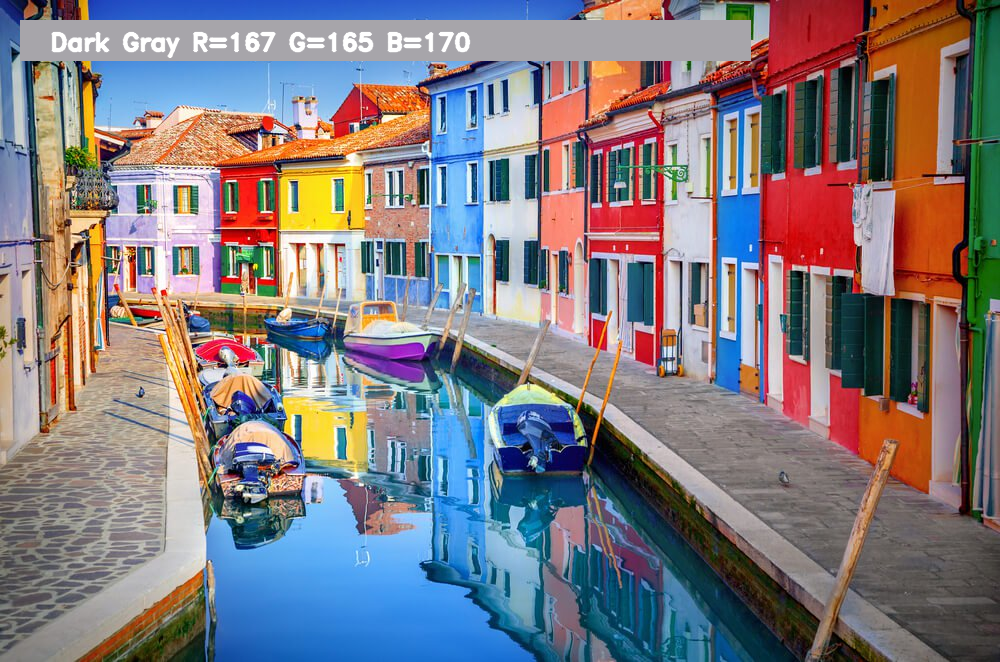

In [ ]:
# Dataset - https://github.com/codebrainz/color-names/blob/master/output/colors.csv

import cv2
import pandas as pd
from google.colab.patches import cv2_imshow # Import for Colab image display

img_path = '/content/colorpic.jpg' # Correct path for Colab
img = cv2.imread(img_path)

# Check if image loaded successfully
if img is None:
    print(f"Error: Could not load image from {img_path}")
else:
    # Reading csv file with pandas and giving names to each column
    index = ["color", "color_name", "hex", "R", "G", "B"]
    csv = pd.read_csv('colors.csv', names=index, header=None)

    # function to calculate minimum distance from all colors and get the most matching color
    def get_color_name(R, G, B):
        minimum = 10000
        cname = "Unknown" # Initialize cname
        for i in range(len(csv)):
            d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
            if d <= minimum:
                minimum = d
                cname = csv.loc[i, "color_name"]
        return cname

    # --- Simulate a click at the center of the image for demonstration ---
    h, w, _ = img.shape
    x_pos_simulated = w // 2
    y_pos_simulated = h // 2

    # Get B, G, R values from the simulated position
    b, g, r = img[y_pos_simulated, x_pos_simulated]
    b = int(b)
    g = int(g)
    r = int(r)

    # Draw a rectangle at the top of the image to display the color name and RGB values
    cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

    # Creating text string to display( Color name and RGB values )
    text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

    # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
    cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

    # For very light colours we will display text in black colour
    if r + g + b >= 600:
        cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

    # Display the modified image using Colab's cv2_imshow
    cv2_imshow(img)
